<a href="https://colab.research.google.com/github/Vanshaj-cs/Machine-Learning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Dataset


In [11]:
boston = pd.read_csv('housing.csv')

In [3]:
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [12]:
boston.shape

(489, 4)

In [13]:
boston.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [14]:
boston.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


correlation and heatmap


In [16]:
correlation = boston.corr()

<Axes: >

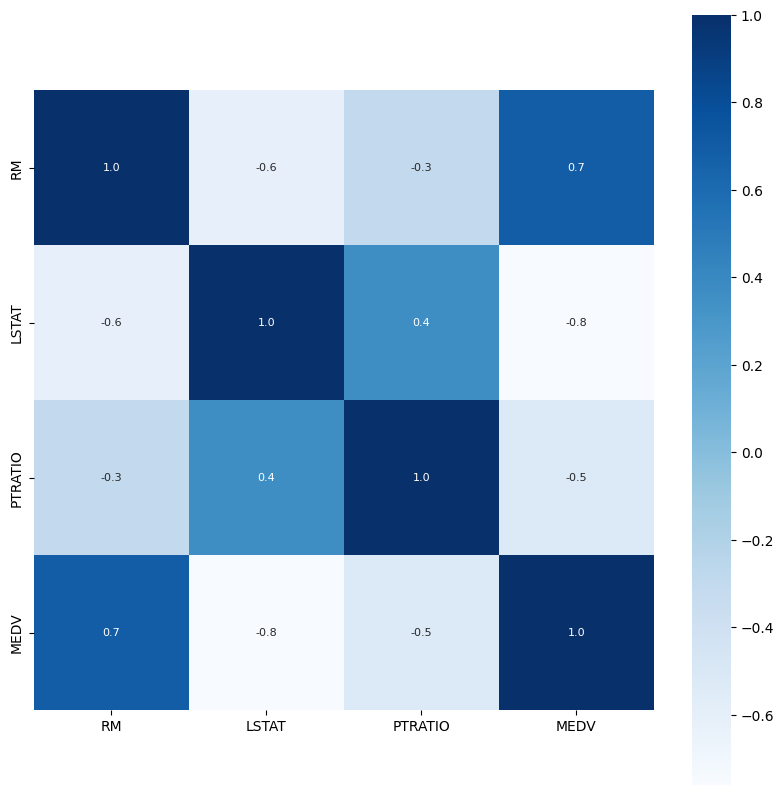

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

splitting the data

In [23]:
X = boston.drop(['MEDV'], axis=1)
Y = boston['MEDV']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Model training

In [31]:
XGB = XGBRegressor()

In [32]:
XGB.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [33]:
training_data_pred = XGB.predict(X_train)

In [37]:
score_1 = metrics.r2_score(Y_train, training_data_pred)
score_2 = metrics.mean_absolute_error(Y_train, training_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9992886159041628
Mean Absolute Error :  3175.1219229539643


In [39]:
test_data_pred = XGB.predict(X_test)

In [40]:
score_1 = metrics.r2_score(Y_test, test_data_pred)
score_2 = metrics.mean_absolute_error(Y_test, test_data_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.795423495012781
Mean Absolute Error :  55792.880420918365


Visualizing the actual and predicted data

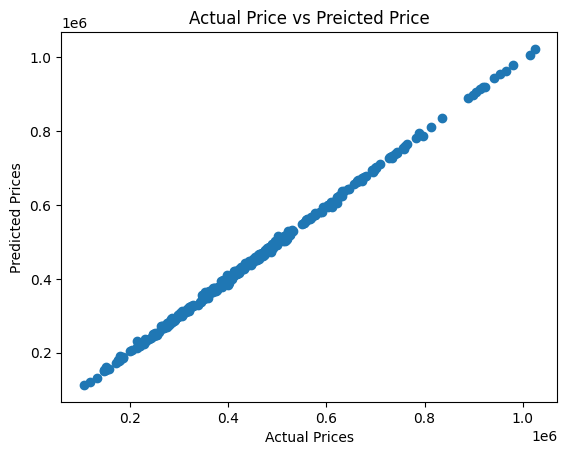

In [41]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()